In [1]:
import numpy as np
import matplotlib.pyplot as plt

Import .py functions

In [2]:
from Simulators import BanditSimulator, ConfoundingBanditSimulator
from Samplers import StandardThomspon, CausalThomspon
from Environment import Environment

In [3]:
# Total Regret after n pulls:
def regret(probabilities, choices):  
    w_opt = probabilities.max()
    return(w_opt - probabilities[choices.astype(int)]).cumsum()

### Standard Sampler on Non-Confounding simulator

In [4]:
# Input bandit probabilities
True_bandit_probs = np.array([0.3, 0.60, 0.75])

# Simulate the bandits
bandits = BanditSimulator(True_bandit_probs)

# Select sampling algorithm
bandit_algo = StandardThomspon(bandits, Environment({}))

If you want to simply run the bandit algorithm, do:

In [5]:
n_pulls = 100
bandit_algo.sample_bandits(n_pulls)

You can check the trials with:

In [6]:
bandit_algo.trials

array([ 2., 18., 80.])

The successes with:

In [7]:
bandit_algo.wins

array([ 0., 11., 63.])

And the choices

In [8]:
bandit_algo.choices

[array([2., 2., 2., 2., 2., 2., 1., 1., 1., 0., 1., 1., 2., 0., 1., 2., 2.,
        2., 2., 2., 2., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1.,
        2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])]

Plot expected value of regret. For this we repeat the experiment `n_trials` times and calculate the expected value of the regret at each pull. For large values of `n_pulls` and `n_trials`, this takes a couple minutes.

In [9]:
# Cumulative regret:
n_pulls = 1000 # number pulls for a trial
n_trials = 200 # number of trials/times we repeat the experiment to get E[regret]
expected_total_regret = np.zeros(n_pulls)
for i in range(n_trials):
    bandit_algo.initialize() # reset these variables to their blank states
    bandit_algo.sample_bandits(n_pulls)
    regret_this_trial = regret(True_bandit_probs, bandit_algo.choices)
    expected_total_regret += regret_this_trial
                                                

AttributeError: 'list' object has no attribute 'astype'

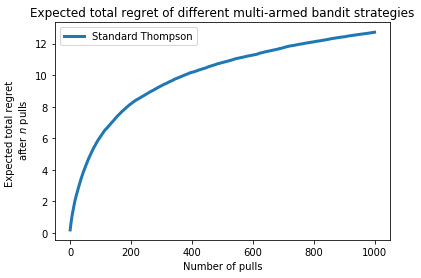

In [11]:
plt.plot(expected_total_regret/n_trials, lw =3,
          label = "Standard Thompson")

plt.title("Expected total regret of different multi-armed bandit strategies")
plt.xlabel("Number of pulls")
plt.ylabel("Expected total regret \n after $n$ pulls")
plt.legend(loc="upper left");
plt.show()

### Standard Sampler on Confounding Simulator

In [12]:
# Input bandit probabilities
True_bandit_probs = np.array([
    np.array([
        np.array([.1, .5]),
        np.array([.4, .2])
    ]),
    np.array([
        np.array([.5, .1]),
        np.array([.2, .4])
    ])
])

# Simulate the bandits
bandits = ConfoundingBanditSimulator(True_bandit_probs)

# Setup the environment
env_probs = {
    'drunk': .5,
    'blinking': .5
}
environment = Environment(env_probs)

# Select sampling algorithm
bandit_algo = StandardThomspon(bandits, environment)

Sample the bandits

In [13]:
n_pulls = 1000
bandit_algo.sample_bandits(n_pulls)

In [18]:
# Cumulative regret:
n_pulls = 1000 # number pulls for a trial
n_trials = 200 # number of trials/times we repeat the experiment to get E[regret]
expected_total_regret = np.zeros(n_pulls)
for i in range(n_trials):
    bandit_algo.initialize() # reset these variables to their blank states
    bandit_algo.sample_bandits(n_pulls)
    regret_this_trial = regret(True_bandit_probs, bandit_algo.choices)
    print(regret_this_trial)
    expected_total_regret += regret_this_trial

[4.000e-01 4.000e-01 5.000e-01 ... 7.996e+02 7.997e+02 8.000e+02]


ValueError: operands could not be broadcast together with shapes (1000,) (4000,) (1000,) 